<div>
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
     <td align="left"; style="background-color:transparent; width: 33%;"><a href="http://www.math-evry.cnrs.fr/departement/doku.php?id=formation:master:m2ds"><img src="https://github.com/ramp-kits/scMARK_classification/raw/main/evry_logo.png" width="65%"></a></td>
    <td align="center"; style="background-color:transparent; width: 33%;"><a href = "https://dataia.eu/"><img src="https://github.com/ramp-kits/bovine_embryo_survival_prediction/raw/main/DATAIA-h.png" width="80%"></a></td>
    <td align="right"; style="background-color:transparent; width: 33%;"><a href="https://www.inrae.fr"><img src="https://www.inrae.fr/themes/custom/inrae_socle/logo.svg" width="40%"></a></td>
  </tr>
</table>
</div>


<center><h1>Single-cell RNA-seq classification</h1></center>

<center><h3>A RAMP data-challenge on the prediction of cellular types based on genes expression level </h3></center>
<br/>


<center><i>Nicolas Jouvin (MIA Paris-Saclay, Associate Professor @ Univ. Paris-Saclay), François Caud (DATAIA, Univ. Paris-Saclay) </i></center>

#Mamadou DIOUF

<center><h4> This data-challenge was created for the data-camp course of the Master 2 Data-Science of Université Évry (Paris-Saclay) </h4></center>

# Introduction

Biologically, [it is known that](https://www.ncbi.nlm.nih.gov/books/NBK26885/), while cells carry (almost) the same genomic information, they tend to *express* only a fraction of their genes leading to specialization into specific *types* with different biological functions. Thus, cell-types study and classification is of primary interest for many biological and medical applications. In the past decade, measuring genes expression level at the scale of a unique cell has become possible with the rise of high-throughput technologies named single-cell RNA-seq (scRNA-seq).

The goal of this data challenge is the **supervised** classification of cell-types thanks to the **scMARK** benchmark dataset from [Mendonca et. al](https://www.biorxiv.org/content/10.1101/2021.12.08.471773v1). The authors compiled 100, 000 cells expression from 10 different studies to serve as a comparison for different machine learning approaches, in an analogy with the MNIST benchmark dataset for computer vision.

This data-challenge uses a small extraction with only 4 cell-types (the labels to predict) from **scMARK**:

    1. Cancer_cells
    2. NK_cells
    3. T_cells_CD4+
    4. T_cells_CD8+
    
The public dataset contains 1500 points splitted in 1000 training points and 500 test points. It will serve as your local benchmark for developing your submissions. On the server side, your submission will use the whole 1500 public points as the training set, and another **private and unavailable test** dataset, containing 1500 supplementary test points, will be used for the ranking of participants. The labels' distribution in the public (resp. private) training and testing datasets are the same.

# Setup

If marked as `code`, the two following cells will

* install the required package dependencies
* download the public data on OSF

They are disabled by default since you only have to call these command once (in your dedicated Python env). You can examine the file, `requirements.txt`, included in the repo to view the list of dependencies.

<div class="alert alert-block alert-info">
<b>Info:</b> Due to the structure of the challenge, libraries not included in `requirements.txt` will need to be added via a pull request to the <a href=https://github.com/ramp-kits/scMARK_classification> GitHub repo </a>.
</div>

In [ ]:
!pip install -r /content/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.0/130.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 11.9 MB/s eta 0:00:00
  Preparing metadata

In [ ]:
!pip install -r /content/extra_libraries.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/content/extra_libraries.txt'


In [ ]:
!python /content/download_data.py

Checking the data URL...Ok.
100% 9.01M/9.01M [00:01<00:00, 6.93Mbytes/s]
Extracting now...Ok.
Removing the archive...Ok.
Checking the data...Ok.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# The data

### Loading data
Raw data are stored in h5ad format which can be read via the `scanpy.read_h5ad` function which returns an [AnnData](https://anndata.readthedocs.io/) object.

The `problem.py` file contains the definition of the data-challenge according to the RAMP framework. In addition, it contains an helper functions to import data.

In [ ]:
!pip install -U jupyter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 7.7 MB/s eta 0:00:00


In [ ]:
!pip install ramp-workflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from problem import get_train_data, get_test_data
X_train, y_train = get_train_data()
X_test, y_test = get_test_data()

In [ ]:
X_train

<1000x13551 sparse matrix of type '<class 'numpy.float32'>'
	with 1091156 stored elements in Compressed Sparse Row format>

#### Labels proportions
A first inspection of the labels indicates that the classes are imbalanced.
> Note: the same analysis may be conducted for y_test.

In [ ]:
lab_df = pd.DataFrame({'label': y_train})
lab_df.value_counts(normalize=True)

label       
T_cells_CD8+    0.342
T_cells_CD4+    0.336
Cancer_cells    0.237
NK_cells        0.085
dtype: float64

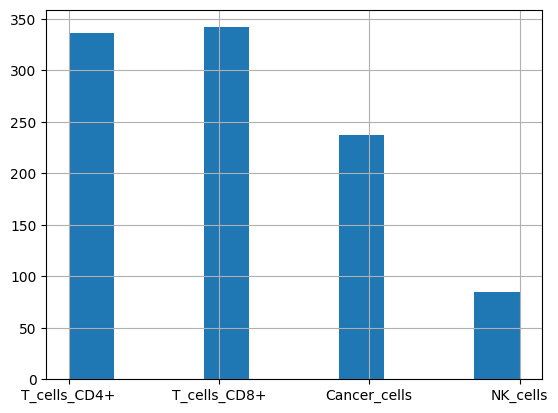

In [ ]:
lab_df.label.hist();

#### Sparse matrix and NumPy arrays

Secondly, looking at the features

In [ ]:
print(X_train.shape)
print(type(X_train))

(1000, 13551)
<class 'scipy.sparse._csr.csr_matrix'>


We see that we have a fairly high dimensional problem with 1000 data points (unique cells) described by 14059 variables (genes). Since we measure expression level, the data is quite sparse, with many unexpressed genes for each cell. Thus, `get_*_data()` functions returns $X$ as a `scipy` [sparse matrix stored in row format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html). This is useful

    1. To save memory space
    2. Some algorithm may work with scipy's sparse CSR matrices.

Of course many existing algorithm, *e.g.* in scikit-learn, may throw error when given such an object, requiring a `np.array` type. Thankfully the `.toarray()` method straightforwadly converts to NumPy.

In [ ]:
X_train.toarray()

array([[1., 0., 0., ..., 3., 2., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### A first look at the data

<div class="alert alert-block alert-warning">
<b>Warning:</b> This section purposedly presents a naive example of data manipulation. It is expected of you to dive deeper into the data analysis and do proper pre-processing.

</div>


A particularity of RNA-seq data is that total counts may vary widely between cells and/or genes.


In [ ]:
total_genes_counts = X_train.toarray().sum(axis=0)
total_cell_counts = X_train.toarray().sum(axis=1)

In [ ]:
 import pandas as pd

In [ ]:
tg=pd.DataFrame(total_genes_counts)

In [ ]:
tg.shape

(13551, 1)

In [ ]:
tg.describe(percentiles=[0.05,0.10,0.15,0.2,.25, 0.4,.5,.6,0.7,.75,0.8,0.85,0.9,0.95,1],p)

,0
count,13551.000000
mean,246.039993
std,1656.281128
min,1.000000
5%,4.000000
10%,8.000000
15%,11.000000
20%,16.000000
25%,21.000000
40%,39.000000


In [ ]:
total_genes_counts[total_genes_counts>130].shape

(3375,)

In [ ]:
a=tg.index[tg[0]>21]

In [ ]:
X_t=X_train[:,tg.index[tg[0]>21]]

In [ ]:
tg.index[tg[0]>45]

Int64Index([    0,     1,     3,     4,     5,     7,     8,     9,    10,
               11,
            ...
            13514, 13515, 13516, 13518, 13521, 13538, 13543, 13548, 13549,
            13550],
           dtype='int64', length=7486)

In [ ]:
tg.index[tg[0]>54]

Int64Index([    0,     1,     3,     4,     7,     8,     9,    10,    11,
               13,
            ...
            13510, 13514, 13516, 13518, 13521, 13538, 13543, 13548, 13549,
            13550],
           dtype='int64', length=6736)

In [ ]:
tc=pd.DataFrame(total_cell_counts)

In [ ]:
tc.describe()

,0
count,1000.000000
mean,3334.087891
std,4504.520020
min,186.000000
25%,1064.250000
50%,1995.000000
75%,3274.000000
max,37679.000000


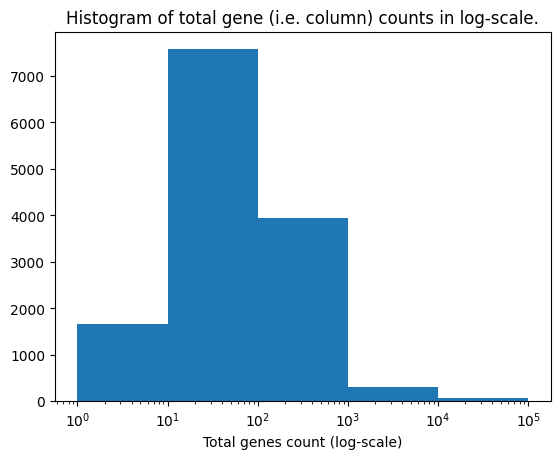

In [ ]:
# plt.hist(np.log10(total_genes_counts), bins = np.arange(6))
plt.hist(total_genes_counts, bins = 10**np.arange(6))
plt.xscale("log")
plt.title("Histogram of total gene (i.e. column) counts in log-scale.")
plt.xlabel('Total genes count (log-scale)')
plt.show()

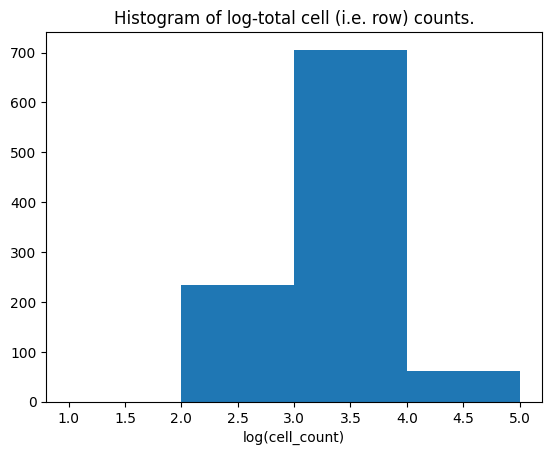

In [ ]:
plt.hist(np.log10(total_cell_counts), bins = np.arange(1,6))
plt.title("Histogram of log-total cell (i.e. row) counts.")
plt.xlabel('log(cell_count)')
plt.show()

This suggests for some normalization of the counts. There are many normalization possible for RNA-seq data, and one of the goal of this challenge is to test for different pre-processing. For simplicity, here we choose to normalize each row (cell) by its total count.

In [ ]:
def preprocess_X(X):
    X = X.toarray()
    return X / X.sum(axis=1)[:, np.newaxis]

X_train_norm = preprocess_X(X_train)
# sanity check
np.allclose(X_train_norm.sum(axis=1), np.ones(X_train_norm.shape[0]))

True

# The score function

This challenge scores your submissions and ranks participants with a balanced accuracy score, computed via the (unadjusted) sklearn's `balanced_accuracy_score` function.

Balanced accuracy is computed as the average of Recall scores for each class [see implementation for more details](https://github.com/scikit-learn/scikit-learn/blob/8c9c1f27b/sklearn/metrics/_classification.py#L2180). It is between 0 and 1, the higher, the better.

In [ ]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score

In [ ]:
# this custom class is used by the challenge and calls
# balanced_accuracy_score(y_true, y_pred, adjusted=False)
# under the hood
from problem import BalancedAccuracy

# A first (naive) try at the challenge
We now show a first naive attempt at the challenge, and will proceed in two steps :

    1. First, we will construct a classifier step-by-step.
    2. Then, we will show how to implement this classifier as a proper RAMP submision.
## Step-by-step construction of a classifier

Given the high-dimensional nature of the problem we will construct a classifier: standardize data, do a PCA retaining only the 50 first components, and finally fit a random forest classifier on the 50 first components.

This can be easily implemented as a scikit-learn `Pipeline`.

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
# Calculate explained variance for different numbers of components
variance = []
for n in range(100,250,15):
    nmf = NMF(n_components=n,max_iter = 10000, random_state=42)
    X_nmf = nmf.fit_transform(X_train)
    explained_variance = 1 - (nmf.reconstruction_err_ / X_train.shape[0])
    variance.append(explained_variance)

# Plot elbow plot
plt.plot(range(100,250,15), variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
# Calculate explained variance for different numbers of components
variance = []
for n in range(100, 221,10):
    svd = TruncatedSVD(n_components=n, random_state=42)
    X_svd = svd.fit_transform(X_train_norm)
    explained_variance = svd.explained_variance_ratio_.sum()
    variance.append(explained_variance)

# Plot elbow plot
plt.plot(range(100, 221,10), variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

plt.show()
# In this example, we calculate the explained variance for different numbers of components using scikit-learn's TruncatedSVD class. We then plot the explained variance as a function of the number of components. You can visually inspect the plot to choose the number of components where the explained variance starts to level off or where the slope of the curve becomes less steep.

# Note that the optimal number of components may depend on the specific dataset and task, so it's a good idea to experiment with different numbers of components and evaluate the model performance on a validation set or using cross-validation.








In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest, chi2, f_classif,SelectPercentile,VarianceThreshold

from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


params = {
    'loss': 'log_loss',
    'learning_rate': 0.1,
    'n_estimators': 160,
    'max_depth': 6,
    'min_samples_split': 4,
    'min_samples_leaf': 10,
    'max_features': None,
    'random_state': 42
}

pipe = make_pipeline(
 StandardScaler(with_mean=False),

        GradientBoostingClassifier(**params)
        )
pipe

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=6, min_samples_leaf=10,
                                            min_samples_split=4,
                                            n_estimators=160,
                                            random_state=42))])

In [ ]:

# fit on train
pipe.fit(X_train_norm, y_train)
y_tr_pred = pipe.predict(X_train_norm)

# predict on test
X_test_norm = preprocess_X(X_test)
y_te_pred = pipe.predict(X_test_norm)



Train balanced accuracy : 1.000
Test balanced accuracy : 0.826


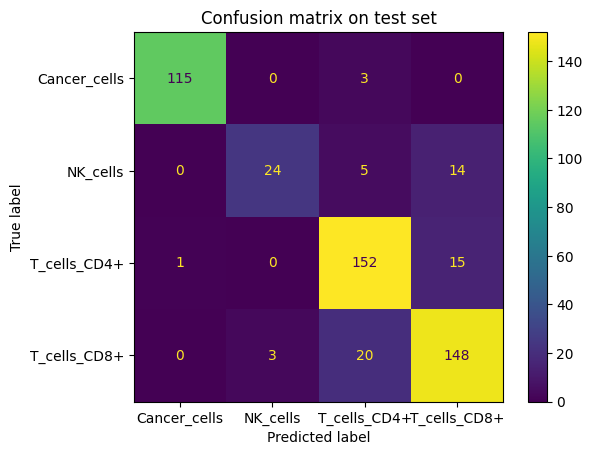

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# compute balanced accuracy and confusion matrix
print(f"Train balanced accuracy : {balanced_accuracy_score(y_train, y_tr_pred):.3f}")
print(f"Test balanced accuracy : {balanced_accuracy_score(y_test, y_te_pred):.3f}")
cm = confusion_matrix(y_test, y_te_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_, )
disp.plot()
plt.title("Confusion matrix on test set");

This naive classifier does a better job than a dummy random classifier which would yield an average balanced accuracy of 1/4.
However, it never predicts the "NK_cell" type and seems to confuse between the two different "T-cell" types. There seems to be room for improvement. Good news, it is your job ! :)

Next, let's see how to implement this exact same classifier as a receivable RAMP submission

## Designing the RAMP submission
The RAMP challenge is automatized and a submission requires a specific structure described below.


### Mandatory structure of a submission


A submission is stored in `./submissions/<submission_foldername>/` and must contain a Python file named `classifier.py`.

This python script must itself implement (at least) a custom `Classifier` class with
 * A `fit(X, y)` method.
 * A `predict_proba(X)` method.

**Warning**: the `X` argument must be understood as the sparse CSR count data matrix obtained by `get_train_data()`. Thus any pre-processing of the count matrix must be done inside the methods.

We illustrate this below with the naive classifier already implemented.

### Illustration with the naive classifier

> Note: The following class is also implemented in `./submissions/starting_kit/classifier.py`.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
 X_train.shape

(1000, 13551)

In [ ]:
y_train.value_counts()

Cancer_cells    237
NK_cells         85
T_cells_CD4+    336
T_cells_CD8+    342
dtype: int64

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def apply_uda(X, y, n_clusters=4, n_augment=400):
    # Fit k-means clustering on the original data
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    X = X.toarray()
    # Generate new, unlabeled data points by sampling from cluster distributions
    X_new = np.empty((n_augment, X.shape[1]))
    y_t =np.empty((n_augment,),dtype=object)
    for i in range(n_clusters):
        cluster_indices = np.where(kmeans.labels_ == i)[0]
        n_samples = int(n_augment / n_clusters)
        samples = np.random.choice(cluster_indices, size=n_samples, replace=True)
        X_new[i*n_samples:(i+1)*n_samples, :] = X[samples, :]
        labels = ['Cancer_cells','NK_cells','T_cells_CD4+','T_cells_CD8+']
        y_t[i*n_samples:(i+1)*n_samples]= [labels[y[samples].value_counts().argmax()]]*n_samples


    # Combine the original labeled data with the newly generated, unlabeled data
    X_uda = pd.concat([pd.DataFrame(X), pd.DataFrame(X_new)], axis=0)
    y_uda = pd.concat([pd.Series(y), pd.Series(y_t)], axis=0)

    return X_uda, y_uda

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline


def _preprocess_X(X_sparse):
    # cast a dense array
    X = X_sparse.toarray()

    # normalize each row
    return X / X.sum(axis=1)[:, np.newaxis]


class Classifier(object):
    def __init__(self):
        # Use scikit-learn's pipeline
        self.pipe = make_pipeline(
            StandardScaler(with_mean=True, with_std=True),
            LDA(n_components=3),
            RandomForestClassifier(
                max_depth=4, n_estimators=100,
                max_features=2
            ),
        )

    def fit(self, X_sparse, y):
        X = _preprocess_X(X_sparse)
        #X_uda, y_uda = apply_uda(X,y)
        self.pipe.fit( X, y)
        self.classes_ = self.pipe.classes_
        pass

    def predict_proba(self, X_sparse):
        X = _preprocess_X(X_sparse)
        # here we use RandomForest.predict_proba()
        return self.pipe.predict_proba(X)


Below is a simplified version of what RAMP does with your submission.

In [ ]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

In [ ]:
params={'max_depth':(3,4,5),'min_samples_leaf': (3, 4, 5),'min_samples_split': (8, 10, 12),'n_estimators': (100, 200, 300),'criterion':("gini", "entropy"),'max_features':(2,3,4,5)}

In [ ]:
# These parameters will be used in gridsearch and will be found optimum parameters
param_grid = {
    'subsample_for_bin': [100000,150000,200000],
    'min_child_samples': [20,50,100],
    'class_weight': [None, 'balanced'],
    "max_depth": [5,10,15,20]
}
#'colsample_bytree': [0.6,0.8,1],
#

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
lda = LDA(n_components = 3)
X_train,y_train = apply_uda(X_train,y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test.toarray())

In [ ]:
clf=GridSearchCV(LGBMClassifier(),param_grid,cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_child_samples': [20, 50, 100],
                         'subsample_for_bin': [100000, 150000, 200000]})

In [ ]:
clf.best_estimator_

LGBMClassifier(max_depth=15, min_child_samples=50, subsample_for_bin=100000)

In [ ]:
clf.best_params_

{'max_depth': 15, 'min_child_samples': 50, 'subsample_for_bin': 100000}

In [ ]:
clf.best_score_

0.885

In [ ]:

# predict_proba
y_tr_pred_proba = clf.best_estimator_.predict_proba(X_train)
y_te_pred_proba = clf.best_estimator_.predict_proba(X_test)

# convert to hard classification with argmax
y_tr_pred = clf.best_estimator_.classes_[np.argmax(y_tr_pred_proba, axis=1)]
y_te_pred = clf.best_estimator_.classes_[np.argmax(y_te_pred_proba, axis=1)]

In [ ]:
y_tr_pred_proba.shape

(1400, 4)

In [ ]:
# predict_proba
y_tr_pred_proba = clf.best_estimator_.predict_proba(X_train)
y_te_pred_proba = clf.best_estimator_.predict_proba(X_test)

# convert to hard classification with argmax
y_tr_pred = clf.best_estimator_.classes_[np.argmax(y_tr_pred_proba, axis=1)]
y_te_pred = clf.best_estimator_.classes_[np.argmax(y_te_pred_proba, axis=1)]
print('Train balanced accuracy:', balanced_accuracy_score(y_train, y_tr_pred))
print('Test balanced accuracy:', balanced_accuracy_score(y_test, y_te_pred))

Train balanced accuracy: 1.0
Test balanced accuracy: 0.8060084084702624


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# Create a GradientBoostingClassifier object
gbm = GradientBoostingClassifier()

# Define the parameters for GridSearchCV
param_grid = {
    'loss':['log_loss'],
    'n_estimators': [150],
    'min_samples_split':[2,3],
    'max_depth': [6,7]



}

# Create a GridSearchCV object
grid_search = GridSearchCV(gbm, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best parameters to train the GradientBoostingClassifier
best_gbm = GradientBoostingClassifier(**grid_search.best_params_)
best_gbm.fit(X_train, y_train)

# Evaluate the performance of the GradientBoostingClassifier on the test set
score = best_gbm.score(X_test, y_test)
print("Test score: ", score)

Best parameters:  {'loss': 'log_loss', 'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 150}
Best score:  0.8640000000000001
Test score:  0.868


In reality things are a bit more sophisticated. **Locally**, the RAMP platform averages your classifier preformance over a 5-fold cross-validation scheme implemented for you in the `get_cv` method. The good news is, RAMP automatize everything for you thanks to `ramp-test`. The public train, validation and test performance are shown to you for information.


<div class="alert alert-block alert-info">
<b>A note on hyper-parameter search</b> RAMP does not perform hyper-parameter tuning, nor grid-search for you. You need to implement this locally, on your own machine, and fix the hyper-parameters by hand in your Classifier class when sending your submission. Another option is to use K-fold cross-validation in the `fit()` method of your classifier, but it could lead to heavy computation times that would delay your research. </a>.
</div>



### Submitting to RAMP

Before submitting to RAMP, you can test your solution locally to ensure that trivial errors (e.g. typos, path issues, etc.) are resolved. We can test a given submission using the `ramp-test` command that was installed in the virtual environment.  

We'll use the following command:  

`!ramp-test --submission <subm_folder> --quick-test`

The `!` signals that the command should be run on the command line instead of this notebook.  
`ramp-test` is the command to be executed. It signals ramp to perform a local test.

`--submission <subm_folder>` specifies which submission to run. You can have multiple potential submissions in the `submissions/` directory; this prevents `ramp` from running all of them (and by default it runs starting_kit).  

In [ ]:
# Define GradientBoostingClassifier parameters
params = {
    'loss': 'deviance',
    'learning_rate': 0.1,
    'n_estimators': 160,
    'max_depth': 6,
    'min_samples_split': 4,
    'min_samples_leaf': 10
    'max_features': None,
    'random_state': 42
}

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search to tune hyperparameters
grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}
gb = GradientBoostingClassifier(**params)
grid_search = GridSearchCV(gb, grid_params, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Train GradientBoostingClassifier model with optimized hyperparameters
best_params = grid_search.best_params_
gb = GradientBoostingClassifier(**params, **best_params)
gb.fit(X_train, y_train)

# Evaluate model performance on test set
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: {:.4f}".format(accuracy))

SyntaxError: ignored

!ramp-test --submission model_5

In [ ]:
!ramp-test --submission model

Testing Single-cell RNA-seq cell types classification
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/model ...
CV fold 0
	score  bal_acc        time
	train     1.00  615.820817
	valid     0.81    0.299120
	test      0.81    0.127852
CV fold 1
	score  bal_acc        time
	train     1.00  657.737158
	valid     0.84    0.356208
	test      0.81    0.128551
CV fold 2
	score  bal_acc        time
	train     1.00  637.797295
	valid     0.86    0.289555
	test      0.81    0.125177
CV fold 3
	score  bal_acc        time
	train     1.00  662.176904
	valid     0.85    0.209095
	test      0.80    0.089530
CV fold 4
	score  bal_acc        time
	train     1.00  642.603595
	valid     0.86    0.217148
	test      0.83    0.091527
----------------------------
Mean CV scores
----------------------------
	score       bal_acc           time
	train     1.0 ± 0.0  643.2 ± 16.44
	valid  0.84 ± 0.017     0.3 ± 0.05
	test   0.81 ± 0.009     0.1 ± 0.02
---------------------------

In [ ]:
X_new = SelectPercentile(chi2, percentile=5).fit_transform(X_train, y_train)
X_new.shape


(1000, 678)

In [ ]:
import numpy as np

a = np.array([1, 2, 3, 4])
b = np.zeros((700, 4))

# reshape a to match the shape of b
a_reshaped = np.tile(a, (700, 1))

# broadcasting operation
c = a_reshaped + b  # no error
print(a_reshaped)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 ...
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear',probability=True)

# define the grid of hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100]}

# perform a grid search with cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5,)
grid_search.fit(X_train, y_train)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1}
Best score:  0.8280000000000001


In [ ]:
# predict_proba
y_tr_pred_proba = grid_search.best_estimator_.predict_proba(X_train)
y_te_pred_proba = grid_search.best_estimator_.predict_proba(X_test)

# convert to hard classification with argmax
y_tr_pred = grid_search.best_estimator_.classes_[np.argmax(y_tr_pred_proba, axis=1)]
y_te_pred = grid_search.best_estimator_.classes_[np.argmax(y_te_pred_proba, axis=1)]
print('Train balanced accuracy:', balanced_accuracy_score(y_train, y_tr_pred))
print('Test balanced accuracy:', balanced_accuracy_score(y_test, y_te_pred))

Train balanced accuracy: 1.0
Test balanced accuracy: 0.7649943431203157


In [ ]:
!ramp-test --submission PAG

Testing Single-cell RNA-seq cell types classification
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/PAG ...
CV fold 0
	score  bal_acc      time
	train     0.79  5.938738
	valid     0.63  0.289010
	test      0.57  0.152460
CV fold 1
	score  bal_acc      time
	train     0.81  7.529590
	valid     0.57  0.290960
	test      0.58  0.146811
CV fold 2
	score  bal_acc      time
	train     0.82  5.591917
	valid     0.58  0.299564
	test      0.58  0.148092
CV fold 3
	score  bal_acc      time
	train     0.80  7.012595
	valid     0.62  0.321486
	test      0.61  0.163342
CV fold 4
	score  bal_acc      time
	train     0.82  5.409926
	valid     0.62  0.290094
	test      0.60  0.150136
----------------------------
Mean CV scores
----------------------------
	score       bal_acc        time
	train  0.81 ± 0.011  6.3 ± 0.83
	valid  0.61 ± 0.023  0.3 ± 0.01
	test   0.59 ± 0.015  0.2 ± 0.01
----------------------------
Bagged scores
----------------------------
	score  b

In [ ]:
!ramp-test --submission svc2

Testing Single-cell RNA-seq cell types classification
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/svc2 ...
CV fold 0
	score  bal_acc       time
	train     1.00  34.795188
	valid     0.81   6.693959
	test      0.77   4.919719
CV fold 1
	score  bal_acc       time
	train     1.00  33.957849
	valid     0.75   8.492875
	test      0.78   3.165893
CV fold 2
	score  bal_acc       time
	train     1.00  34.902604
	valid     0.78   7.926740
	test      0.77   3.230456
CV fold 3
	score  bal_acc       time
	train     1.00  37.309450
	valid     0.82   6.503139
	test      0.78   4.548967
CV fold 4
	score  bal_acc       time
	train     1.00  33.817153
	valid     0.79   7.835667
	test      0.77   3.420223
----------------------------
Mean CV scores
----------------------------
	score       bal_acc         time
	train     1.0 ± 0.0  35.0 ± 1.25
	valid  0.79 ± 0.022   7.5 ± 0.76
	test   0.77 ± 0.004   3.9 ± 0.73
----------------------------
Bagged scores
-------------

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [ ]:
from sklearn.model_selection import GridSearchCV

# create a grid of hyperparameters to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# create a PassiveAggressiveClassifier model
clf = PassiveAggressiveClassifier(random_state=0)

# perform grid search using cross-validation
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=6)
X,y = apply_uda(X_train, y_train)
grid_search.fit(X,y)
# print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best Hyperparameters: {'C': 0.01, 'max_iter': 1000, 'tol': 0.001}
Best Accuracy: 0.7257142857142856


In [ ]:
# predict_proba
y_tr_pred_proba = grid_search.best_estimator_.predict_proba(X_train)
y_te_pred_proba = grid_search.best_estimator_.predict_proba(X_test)

# convert to hard classification with argmax
y_tr_pred = grid_search.best_estimator_.classes_[np.argmax(y_tr_pred_proba, axis=1)]
y_te_pred = grid_search.best_estimator_.classes_[np.argmax(y_te_pred_proba, axis=1)]
print('Train balanced accuracy:', balanced_accuracy_score(y_train, y_tr_pred))
print('Test balanced accuracy:', balanced_accuracy_score(y_test, y_te_pred))

AttributeError: ignored

In [ ]:
import pandas as pd
pd.Series(y_train)

In [ ]:
apply_uda(x_train,y_train)

In [ ]:
RandomForestClassifier()

In [ ]:
 from sklearn.svm import SVC

In [ ]:
SVC()

In [ ]:
params1= {'kernel':('linear','rbf'),'C':(0.01, 0.1, 1, 10, 100),'gamma':('auto','scale')}


In [ ]:
clf=GridSearchCV(SVC(probability=True,break_ties=True),params1,cv=5)
clf.fit(X_train, y_train)
clf.best_params_

KeyboardInterrupt: ignored

In [ ]:
clf.best_params_

{'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}

In [ ]:
clf.best_score_


0.8721428571428571

In [ ]:
clf.best_estimator_

SVC(C=0.01, break_ties=True, gamma='auto', kernel='linear', probability=True)

In [ ]:
svc = SVC(kernel='linear', probability=True)
svc.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [ ]:

# predict_proba
y_tr_pred_proba = clf.best_estimator_.predict_proba(X_train)
y_te_pred_proba = clf.best_estimator_.predict_proba(X_test)

# convert to hard classification with argmax
y_tr_pred = clf.best_estimator_.classes_[np.argmax(y_tr_pred_proba, axis=1)]
y_te_pred = clf.best_estimator_.classes_[np.argmax(y_te_pred_proba, axis=1)]


In [ ]:
y_tr_pred

In [ ]:
y_tr_pred

In [ ]:
print('Train balanced accuracy:', balanced_accuracy_score(y_train, y_tr_pred))
print('Test balanced accuracy:', balanced_accuracy_score(y_test, y_te_pred))

Train balanced accuracy: 1.0
Test balanced accuracy: 0.7635062478822203


We see that the mean CV scores are consistent with the previous result we had. If you use a classifier with more variance, you would see more variation accross CV-folds.

<div class="alert alert-info">
    
<b>Note on style complicance</b> Every `submissions/*.py` files will be checked for style compliance before running on RAMP server. It is done thanks to the [flake8](https://flake8.pycqa.org/en/latest/) package. Before submitting, you need to fix any error raised by the following terminal command
    
`$flake8 submissions/`
<br/>

The **black** auto-formatting tool works very well to automatically format your code accoring to flake8 standard when saving your files in VScode or PyCharm IDEs.

You might want to check [this page](https://flake8.pycqa.org/en/3.1.1/user/ignoring-errors.html) for ignoring specific errors in some corner-cases.

</div>

In [ ]:
!pip install flake8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Ranking & Leaderboard

**On the server**, the participants are ranked according to the balanced accuracy score on the private test data set. However, only the ranking will be available, and not the score in itself in order to avoid overfitting of this private test set. The score on public test will be available as a proxy but your submission could very well have a better ranking on private with a worst balanced accuracy on public.

## More information

You can find more information in the [README](https://github.com/paris-saclay-cds/ramp-workflow/blob/master/README.md) of the [ramp-workflow library](https://github.com/paris-saclay-cds/ramp-workflow).

